<a href="https://colab.research.google.com/github/Abdelrahman2064/my-portfolio/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('/content/worldometer_data.csv')

In [48]:
df2=pd.read_csv('/content/covid_19_clean_complete.csv')

In [49]:
df.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [50]:
df2.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [51]:
df2['Date'].min()
df2['Date'].max()

print("Start:", start_date)
print("End:", end_date)

Start: 2020-01-22
End: 2020-07-27


In [52]:
df.isnull().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


In [53]:
df2.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [54]:
Total_Cases= df['TotalCases'].sum()

In [55]:
Total_Deaths= df['TotalDeaths'].sum()

In [56]:
death_rate = ('Total_Deaths/Total_Cases') * 100
print("Global death rate (%):", round(global_death_rate, 2))

Global death rate (%): 3.72


In [57]:
top_countries = df[['Country/Region', 'TotalCases']].sort_values(by='TotalCases', ascending=False).head(10)
print(top_countries)

  Country/Region  TotalCases
0            USA     5032179
1         Brazil     2917562
2          India     2025409
3         Russia      871894
4   South Africa      538184
5         Mexico      462690
6           Peru      455409
7          Chile      366671
8       Colombia      357710
9          Spain      354530


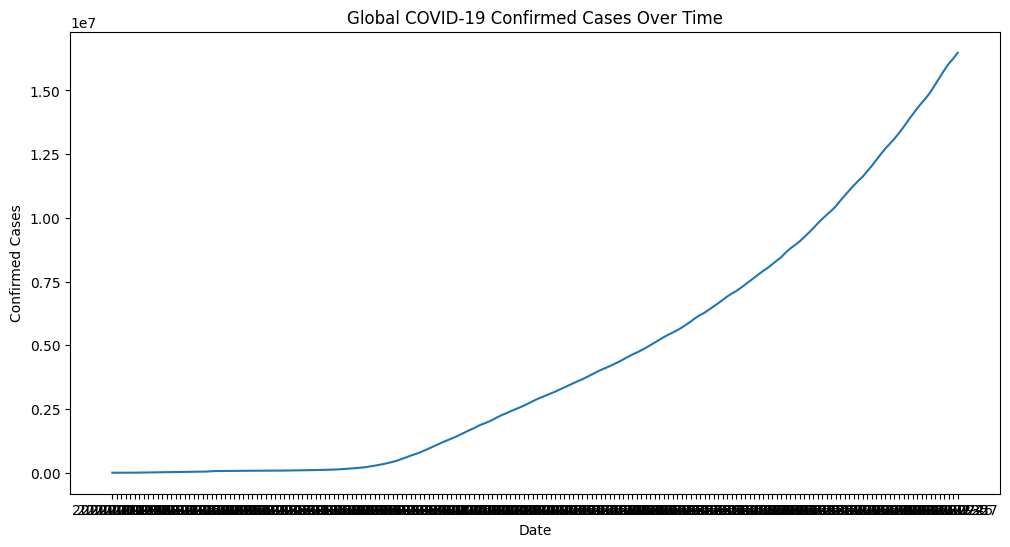

In [60]:
daily_cases = df2.groupby('Date')['Confirmed'].sum()

plt.figure(figsize=(12,6))
plt.plot(daily_cases.index, daily_cases.values)
plt.title("Global COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

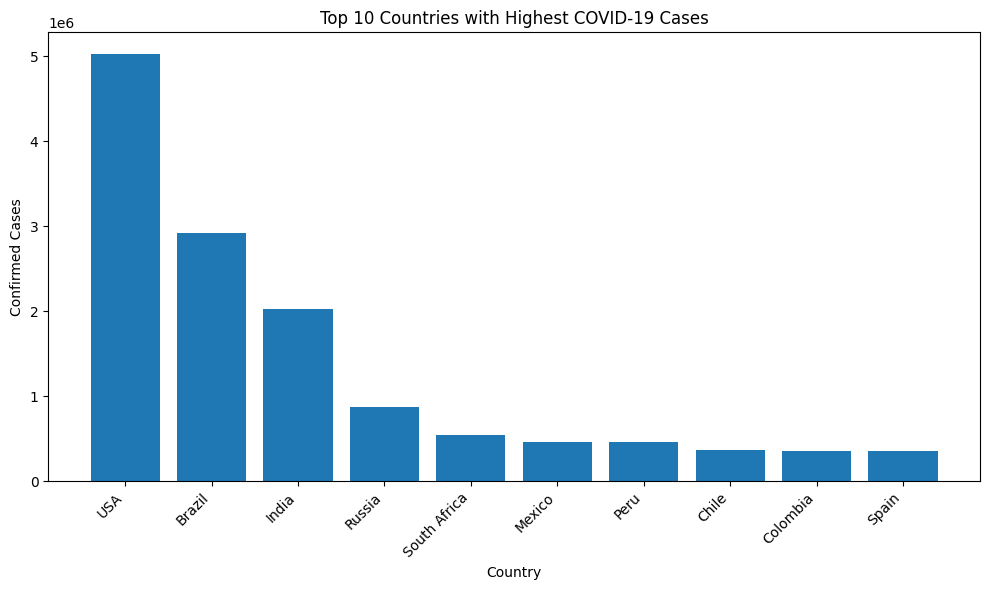

In [65]:
plt.figure(figsize=(10,6))
plt.bar(top_countries["Country/Region"], top_countries["TotalCases"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.title("Top 10 Countries with Highest COVID-19 Cases")
plt.tight_layout()
plt.show()

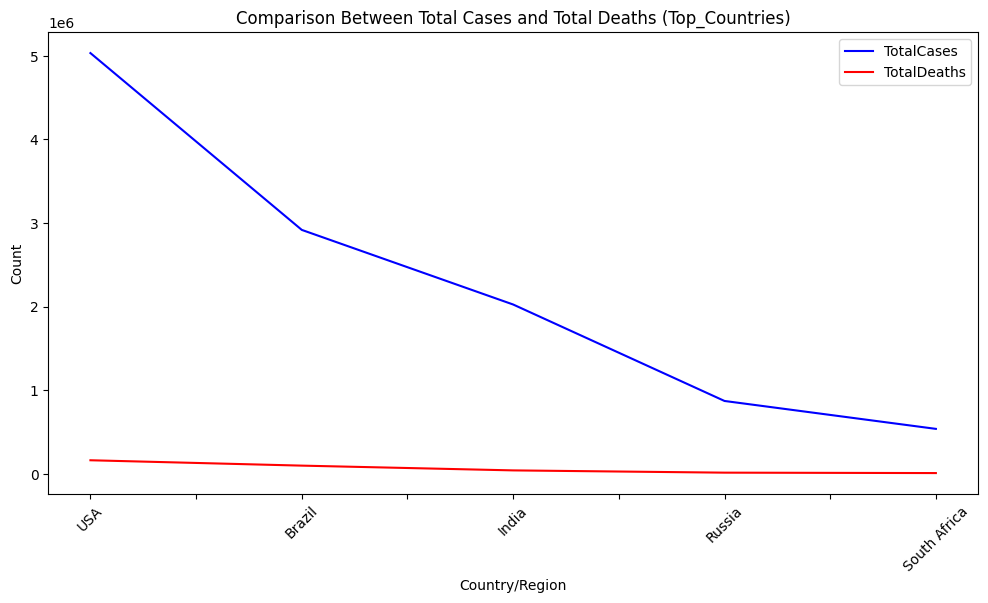

In [87]:
country_summary = df.groupby('Country/Region')[['TotalCases','TotalDeaths']].sum().sort_values('TotalCases', ascending=False).head()
country_summary.plot(kind='line', figsize=(12,6), color=['blue','red'])
plt.title("Comparison Between Total Cases and Total Deaths (Top_Countries)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [94]:
df2['GrowthRate'] = df['TotalCases'].pct_change() * 100


In [109]:
print(df2[[ 'GrowthRate']])


       GrowthRate
0             NaN
1      -42.021895
2      -30.578716
3      -56.952201
4      -38.274148
...           ...
49063         NaN
49064         NaN
49065         NaN
49066         NaN
49067         NaN

[49068 rows x 1 columns]


In [97]:
max_growth = df2['GrowthRate'].max()
max_growth_date = df2.loc[df2['GrowthRate'] == max_growth, 'Date'].values[0]
print(f"The highest growth rate was {max_growth:.2f}% on {max_growth_date}")


The highest growth rate was 0.00% on 2020-01-22T00:00:00.000000000


In [105]:
continent_summary = df.groupby('Continent')[['TotalCases','TotalDeaths']].sum().reset_index()
print(continent_summary)

           Continent  TotalCases  TotalDeaths
0             Africa     1011867      22114.0
1               Asia     4689794     100627.0
2  Australia/Oceania       21735        281.0
3             Europe     2982576     205232.0
4      North America     5919209     229855.0
5      South America     4543273     154885.0


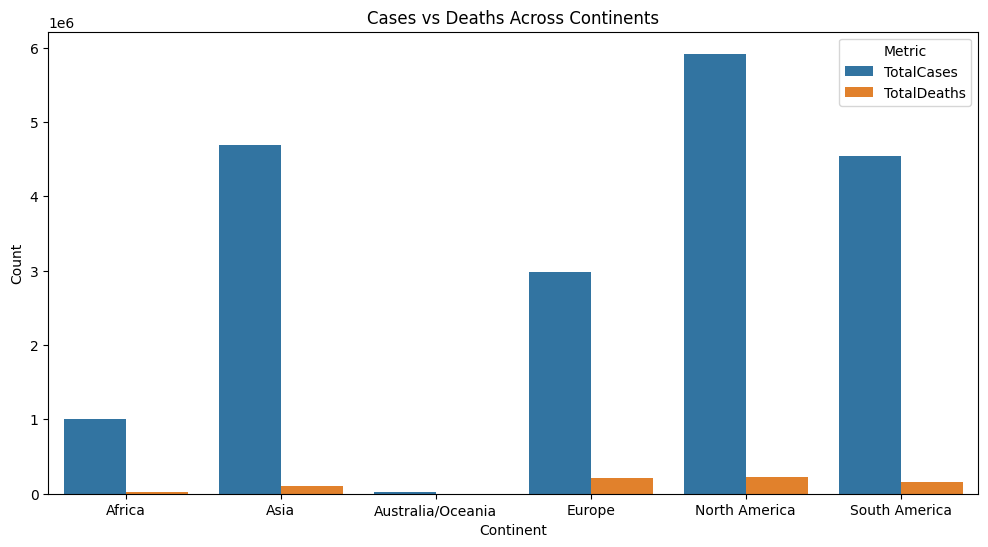

In [106]:
import seaborn as sns

continent_melted = continent_summary.melt(id_vars='Continent', value_vars=['TotalCases','TotalDeaths'],
                                         var_name='Metric', value_name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=continent_melted, x='Continent', y='Count', hue='Metric')
plt.title("Cases vs Deaths Across Continents")
plt.ylabel("Count")
plt.show()

In [112]:
df['DeathRate'] = (df['TotalDeaths'] / df['TotalCases']) * 100
df = df[df['TotalCases'] > 0]
best_country = df.loc[df['DeathRate'].idxmin()]

print("Best handled country:", best_country['Country/Region'])
print("Death Rate (%):", round(best_country['DeathRate'], 2))

Best handled country: Singapore
Death Rate (%): 0.05
